<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Dayana Navarro Valencia y Juan Pablo Ruiz Magaña.

**Fecha:** 27 de Abril 2021:

**Expediente** : 721470 y 721093
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link del Repositorio**:https://github.com/JuanPablo2019/Tarea9.git

# Tarea 9:  Clase 22

## Enunciado de tarea 
# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

### `Respuesta de Dayana`

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline


### `Elección del activo:` _Mc´Donalds_

In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

### PRECIOS DE CIERRE

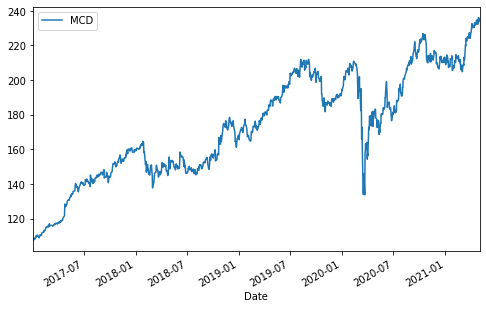

In [4]:
ticker = ['MCD']
start_date = '2017-01-01'

closes_mc = get_adj_closes(ticker, start_date)
closes_mc.plot(figsize=(8,5));
plt.legend(ticker);

### PRECIOS CIERRE LOGARITMICOS

In [5]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

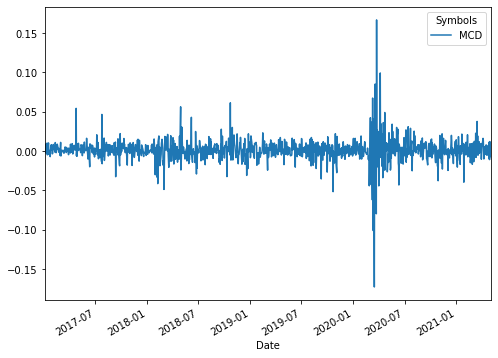

In [6]:
ret_mc = calc_daily_ret(closes_mc)
ret_mc.plot(figsize=(8,6));

## INFORMACIÓN OPCIONES 

In [7]:
mc = web.YahooOptions('MCD')
mc_opt = mc.get_all_data().reset_index()
mc_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,,,,,,,,,,,,
2021-05-07,217.5,call,MCD210507C00217500,17.80,15.25,17.40,0.000000,0.000000,5.0,8.0,0.731692,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-04-30 17:18:23,"{'contractSymbol': 'MCD210507C00217500', 'stri..."
2021-05-07,230.0,call,MCD210507C00230000,4.47,3.75,4.50,-1.330000,-22.931042,18.0,452.0,0.239265,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-05-04 17:55:21,"{'contractSymbol': 'MCD210507C00230000', 'stri..."
2021-05-07,230.0,put,MCD210507P00230000,0.48,0.30,0.49,0.280000,139.999980,551.0,896.0,0.214363,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-05-04 19:46:58,"{'contractSymbol': 'MCD210507P00230000', 'stri..."
2021-05-07,232.5,call,MCD210507C00232500,2.18,2.15,2.54,-1.620000,-42.631577,32.0,555.0,0.210701,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-05-04 19:53:48,"{'contractSymbol': 'MCD210507C00232500', 'stri..."
2021-05-07,232.5,put,MCD210507P00232500,0.98,0.82,1.07,0.590000,151.282060,174.0,336.0,0.197030,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-05-04 19:20:28,"{'contractSymbol': 'MCD210507P00232500', 'stri..."
2021-05-07,212.5,put,MCD210507P00212500,0.04,0.01,0.15,-0.040000,-50.000000,14.0,40.0,0.517583,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-05-04 18:53:00,"{'contractSymbol': 'MCD210507P00212500', 'stri..."
2021-05-07,235.0,put,MCD210507P00235000,2.35,1.98,2.28,1.260000,115.596320,1196.0,529.0,0.194344,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-05-04 19:57:44,"{'contractSymbol': 'MCD210507P00235000', 'stri..."
2021-05-07,237.5,call,MCD210507C00237500,0.36,0.34,0.43,-0.150000,-29.411760,310.0,635.0,0.193367,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-05-04 19:32:20,"{'contractSymbol': 'MCD210507C00237500', 'stri..."
2021-05-07,237.5,put,MCD210507P00237500,4.50,3.10,4.15,2.210000,96.506550,56.0,202.0,0.207039,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-05-04 19:31:18,"{'contractSymbol': 'MCD210507P00237500', 'stri..."


In [8]:
K = 250 # strike price
indice_opt = mc_opt.loc[(mc_opt.Type=='put') & (mc_opt.Strike==K) & (mc_opt.Expiry=='2021-06-18')]
indice_opt

,Strike,Expiry,Type,Symbol,Last,Bid,Ask,Chg,PctChg,Vol,Open_Int,IV,Root,IsNonstandard,Underlying,Underlying_Price,Quote_Time,Last_Trade_Date,JSON
488,250.0,2021-06-18,put,MCD210618P00250000,14.63,17.6,18.85,0.0,0.0,5.0,88.0,0.249153,MCD,False,MCD,234.39,2021-05-04 23:58:56,2021-05-03 14:44:46,"{'contractSymbol': 'MCD210618P00250000', 'stri..."


In [9]:
i_opt= indice_opt.index
opcion_valuar = mc_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'MCD210618P00250000',
 'strike': 250.0,
 'currency': 'USD',
 'lastPrice': 14.63,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 88,
 'bid': 17.6,
 'ask': 18.85,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1620053086,
 'impliedVolatility': 0.24915301635742187,
 'inTheMoney': True}

In [10]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  234.39


### RENDIMIENTO SIMPLE

In [11]:
# Obtenemos el rendimiento simple
Ri = closes_mc.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri.head()

Symbols,MCD
Date,
2017-01-04,-0.001170
2017-01-05,0.001841
2017-01-06,0.008855
2017-01-09,-0.002733
2017-01-10,-0.001495


In [12]:
opcion_valuar.Expiry

Timestamp('2021-06-18 00:00:00')

In [13]:
from datetime import date

# Encontrar la fecha de hoy en fomato timestamp
today = pd.to_datetime(date.today())


# Obtener fecha de cierre de la opción a valuar
expiry = opcion_valuar.Expiry

nscen = 10000

# Generar rangos de fechas de días hábiles
dates =pd.date_range(today, expiry, freq='B')
ndays =len(dates)



In [14]:
# Simular los rendimientos
# Rendimiento diario 
dt = 1
Z = np.random.randn(ndays, nscen)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(Z*sigma_R*np.sqrt(dt)
                     +mu_R*dt, index=dates)


Ri_dt.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2021-05-04,0.001944,-0.008656,0.033187,0.002538,0.010881,0.014262,-0.017923,0.007062,-0.016906,-0.016700,...,0.004905,0.002666,-0.015087,0.000282,0.011634,-0.008965,0.019087,-0.007828,0.013125,0.007132
2021-05-05,-0.006806,-0.001084,0.027786,-0.011517,-0.033736,-0.003679,-0.015747,0.001953,0.000111,-0.000741,...,0.002415,-0.004634,0.011829,-0.022699,-0.007815,-0.005777,0.009126,0.016579,-0.020320,-0.015461
2021-05-06,-0.007167,0.019081,-0.017210,0.001146,-0.004106,-0.013076,0.030175,0.001395,-0.024799,0.018549,...,-0.001078,0.001550,0.015062,-0.006078,0.024947,0.020639,0.024181,-0.010763,-0.000016,0.002396
2021-05-07,-0.018118,0.024182,0.006467,0.010261,0.009753,0.008170,-0.004305,0.019926,0.009284,-0.017028,...,0.036564,0.000605,0.007937,0.001808,0.006483,-0.005435,-0.017225,-0.014506,-0.008308,-0.034010
2021-05-10,-0.015085,-0.000083,0.009679,0.002715,-0.038667,0.023859,-0.002103,0.043213,-0.011322,-0.009142,...,-0.009528,0.001913,-0.001790,-0.011005,0.022016,0.010936,0.001949,-0.009436,0.015870,0.024273


In [15]:
S0= opcion_valuar.Underlying_Price

#np.prod(Ri_dt)

S_T= S0*(Ri_dt + 1).cumprod()

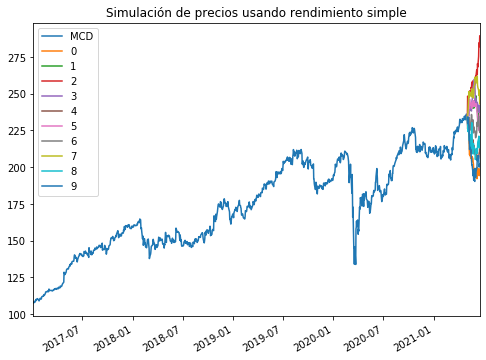

In [16]:
# Simulación del precio
S_0 = closes_mc.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()
S_T.iloc[0,:]=S_0

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_mc, S_T.iloc[:, :10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

### RENDIMIENTOS LOGARITMICOS

In [34]:
# Calcular rendimiento logarítmico
ri = calc_daily_ret(closes_mc)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# Simulación del rendimiento
Z = np.random.randn(ndays, nscen)
sim_ret_ri = pd.DataFrame(mu_r * dt + Z * sigma_r * np.sqrt(dt), index=dates )

# Simulación del precio
S_0 = closes_mc.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

16.321534134191733

In [18]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.015223474709014714, 0.015209789112614234)

Con los precios simulados debemos de encontrar el valor de la opción según la función de pago correspondiente. Para este caso es:
$$
P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}
$$

## Valuación usando el modelo de Black and Scholes

In [19]:
mu = ret_mc.mean()[0]
sigma = ret_mc.std()[0]
mu, sigma

(0.0007114483015164107, 0.015209789112614234)

In [20]:
# Tasa de bonos de 1 yr de fecha 11/23/20 -> 0.10%
r = 0.0016/360

In [21]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry



#ndays = (expiry - today).days
ndays = len(dates)
nscen = 10
dates = pd.date_range(start=today, periods = ndays)
dates

DatetimeIndex(['2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11',
               '2021-05-12', '2021-05-13', '2021-05-14', '2021-05-15',
               '2021-05-16', '2021-05-17', '2021-05-18', '2021-05-19',
               '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-29', '2021-05-30', '2021-05-31',
               '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-05', '2021-06-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()

,0,1,2,3,4,5,6,7,8,9
2021-05-04,-0.001355,0.000562,0.013324,0.014742,0.013164,-0.005097,0.008671,0.006540,0.013954,-0.032391
2021-05-05,-0.006412,-0.003509,0.012798,0.019003,0.019613,0.006039,-0.000382,0.009842,0.003027,-0.044860
2021-05-06,0.004296,0.000894,-0.003395,0.021572,0.031571,-0.014948,-0.010065,-0.021853,0.008411,-0.027795
2021-05-07,0.004572,-0.019607,0.008618,0.027704,0.026258,-0.000642,0.013323,-0.035631,0.010339,-0.026896
2021-05-08,-0.000225,0.008934,0.008164,0.044279,0.028012,0.006395,0.028696,-0.013801,0.021914,-0.051540
2021-05-09,0.013303,0.014300,0.040841,0.033274,0.024684,-0.021994,0.003540,-0.015338,0.010725,-0.054874
2021-05-10,-0.006950,0.012273,0.053918,0.052441,0.010106,-0.037468,-0.013919,-0.009651,0.008581,-0.041825
2021-05-11,-0.022793,-0.009166,0.073935,0.050178,0.011802,-0.009165,-0.037238,0.003076,0.016313,-0.026196
2021-05-12,-0.021919,-0.004622,0.097505,0.055742,0.032583,0.003118,-0.057044,0.012886,0.035048,-0.015573
2021-05-13,0.007580,-0.019771,0.092885,0.081422,0.024411,-0.003248,-0.053853,0.018542,0.038475,0.005132


In [23]:
S0 = closes_mc.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[-1,0]
sim_closes

,0,1,2,3,4,5,6,7,8,9
2021-05-04,233.543359,233.991577,236.996873,237.333018,236.958917,232.670999,235.896612,235.394359,237.146188,226.406515
2021-05-05,232.365192,233.040748,236.872286,238.346479,238.491875,235.276562,233.770721,236.172978,234.568881,223.600832
2021-05-06,234.866839,234.069276,233.067414,238.959675,241.361051,230.390206,231.518117,228.804789,235.835232,227.449278
2021-05-07,234.931731,229.319297,235.884012,240.429546,240.082028,233.709836,236.996542,225.673952,236.290332,227.653952
2021-05-08,233.807409,235.958646,235.777083,244.447646,240.503433,235.360268,240.668045,230.654776,239.041452,222.112099
2021-05-09,236.991759,237.228206,243.608716,241.772425,239.704474,228.772655,234.689304,230.300384,236.381673,221.372844
2021-05-10,232.240354,236.747822,246.815347,246.451059,236.235437,225.259899,230.627509,231.613810,235.875328,224.280596
2021-05-11,228.589867,231.726281,251.805776,245.893955,236.636322,231.726422,225.311595,234.580497,237.706171,227.813324
2021-05-12,228.789843,232.781653,257.811262,247.266060,241.605313,234.590399,220.893068,236.892989,242.201765,230.246363
2021-05-13,235.639438,229.281679,256.622891,253.697982,239.639078,233.101766,221.599064,238.236666,243.033010,235.063315


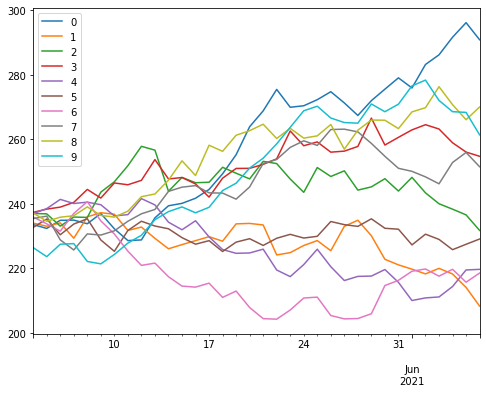

In [24]:
sim_closes.plot(figsize=(8,6));

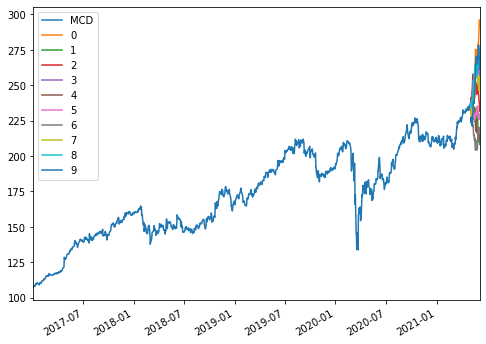

In [25]:
pd.concat([closes_mc,sim_closes]).plot(figsize=(8,6));

In [26]:
opcion_valuar['JSON']

{'contractSymbol': 'MCD210618P00250000',
 'strike': 250.0,
 'currency': 'USD',
 'lastPrice': 14.63,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 5,
 'openInterest': 88,
 'bid': 17.6,
 'ask': 18.85,
 'contractSize': 'REGULAR',
 'expiration': 1623974400,
 'lastTradeDate': 1620053086,
 'impliedVolatility': 0.24915301635742187,
 'inTheMoney': True}

In [27]:
from datetime import date
Hoy = date.today()

# strike price
K = opcion_valuar['JSON']['strike']  

# Fechas a simular
dates = pd.date_range(start= Hoy, periods = ndays, freq='B')

# Escenarios y número de días
ndays = len(dates)
nscen = 100000

# Condición inicial del precio a simular
S0 = closes_mc.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

### PRIMA

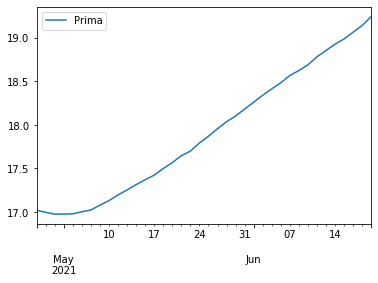

In [35]:
#prima

# Frame con el valor del strike
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)

# Valor del call europeo
put= pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [36]:
put.iloc[-1]

Prima    19.245448
Name: 2021-06-18 00:00:00, dtype: float64

### Intervalo de confianza del 99%

In [38]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(19.06648625380012, 19.424410708982776)


##  Técnicas de reducción de varianza

### PRIMA

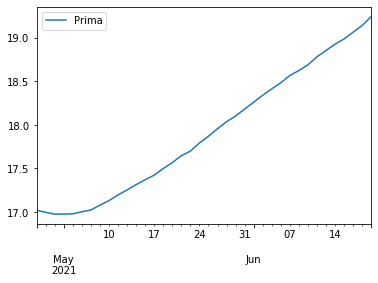

In [39]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [40]:
put.iloc[-1]

Prima    19.245448
Name: 2021-06-18 00:00:00, dtype: float64

### Intervalo de confianza del 99%

In [41]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

(19.06648625380012, 19.424410708982776)


## Análisis de la distribución de los rendimientos

### Ajustando norm

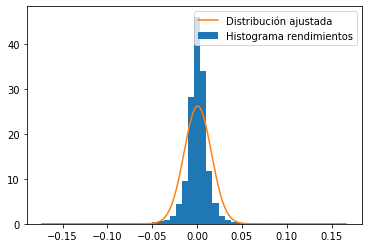

In [42]:
ren = calc_daily_ret(closes_mc) # rendimientos 
y,x,des = plt.hist(ren['MCD'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

### Ajustando t

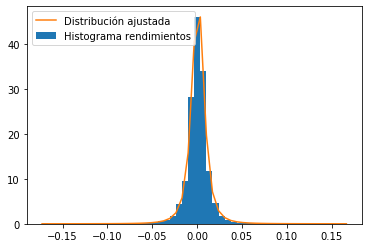

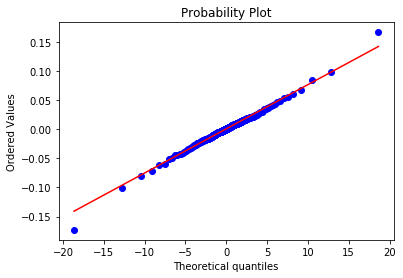

In [43]:
# rendimientos 
ren = calc_daily_ret(closes_mc) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['MCD'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()

# Q-Q
st.probplot(ren['MCD'], sparams=params[:-2], dist=dist, plot=plt);




##  Valuación usando simulación: uso del histograma de rendimientos

In [44]:
ndays = 109 
nscen = 10

In [45]:
prob = y/np.sum(y)
values = x[1:]

In [46]:
#Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)

#fechas 
dates = pd.date_range(start=Hoy,periods=ndays)

#REndimientos simulados en matriz

sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist.head()

,0,1,2,3,4,5,6,7,8,9
2021-04-28,0.003642,0.010431,0.003642,0.010431,0.010431,-0.003147,-0.003147,0.010431,-0.016725,0.003642
2021-04-29,0.010431,0.010431,-0.016725,0.003642,0.010431,-0.023514,0.003642,0.010431,0.010431,0.010431
2021-04-30,0.017220,-0.003147,0.003642,0.003642,0.010431,0.003642,0.003642,-0.023514,-0.043880,0.010431
2021-05-01,0.017220,-0.003147,0.024009,0.003642,0.017220,0.030798,0.024009,0.010431,0.010431,0.017220
2021-05-02,-0.050669,0.003642,-0.050669,0.003642,-0.023514,0.003642,0.010431,-0.003147,0.037587,0.010431


In [47]:
sim_closes_hist = (closes_mc.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist.head()

,0,1,2,3,4,5,6,7,8,9
2021-04-28,233.799990,235.392647,233.799990,235.392647,235.392647,232.218108,232.218108,235.392647,229.086382,233.799990
2021-04-29,236.251553,237.860910,229.922277,236.251553,237.860910,226.821512,233.065431,237.860910,231.488519,236.251553
2021-04-30,240.355055,237.113592,230.761222,237.113592,240.355055,227.649143,233.915845,232.333179,221.550330,238.728822
2021-05-01,244.529832,236.368623,236.368623,237.978778,244.529832,234.769362,239.599901,234.769362,223.873446,242.875353
2021-05-02,232.448307,237.231089,224.690320,238.847119,238.847119,235.625993,242.112280,234.031757,232.448307,245.422077


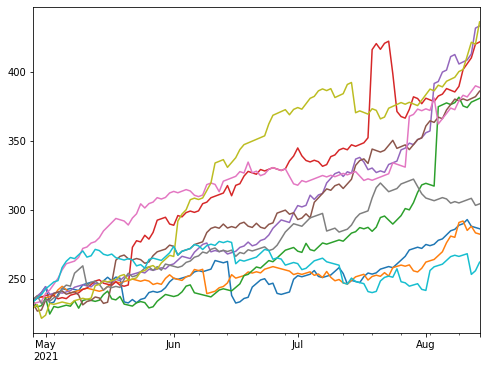

In [48]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

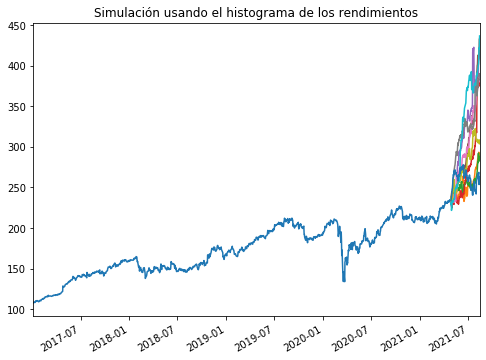

In [49]:
pd.concat([closes_mc,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')


### PRIMA

In [50]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 10000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(ret_mc+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_mc.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

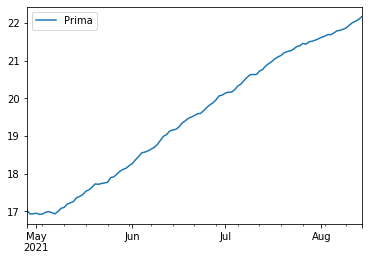

In [51]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [52]:
put_hist.iloc[-1]

Prima    22.166623
Name: 2021-08-14 00:00:00, dtype: float64

### Intervalo de confianza del 95%

In [54]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(21.40370763312131, 22.9295378758849)
(21.40370763312131, 22.9295378758849)


## VALOR TEORICO

Donde:
- $S_0$ = precio de la acción en el momento actual.
- $K$ = precio "de ejercicio" de la opción.
- $r$ = tasa de interés libre de riesgo.
- $T$ = tiempo que le resta de vida a la opción.
- $N(d)$ = función de distribución de la variable aleatoria normal con media nula y desviación típica unitaria
(probabilidad de que dicha variable sea menor o igual que d). Función de distribución de probabilidad acumulada.
- $\sigma$ = varianza por período de la tasa o tipo de rendimiento de la opción.

$$
d_1 = \frac{\ln{\frac{S_0}{K}} + (r + \sigma^2 / 2) T}{\sigma \sqrt{T}}, \quad d_2 = \frac{\ln{\frac{S_0}{K}} + (r - \sigma^2 / 2) T}{\sigma \sqrt{T}} 
$$



In [35]:
d1 = (np.log(S0/K)+(r+(sigma**2/2)*ndays)) / (sigma*np.sqrt(ndays))

In [36]:
d2 = d1-(sigma*np.sqrt(ndays))

In [37]:
valor_teorico = K*np.exp(-r*ndays)*st.norm.cdf(-d2) - S0*st.norm.cdf(-d1)
valor_teorico

18.909266853427255

In [ ]:
Real = 14.63

RECORDANDO LOS SUPUESTOS DE LA FÓRMULA:

1. El comportamiento del precio de la acción corresponde al modelo logarítmico normal, con $\mu$ y $\sigma$
constantes.
2. No hay costos de transición ni impuestos. Todos los títulos son perfectamente divisibles.
3. No hay dividendos sobre la acción durante la vida de la opción.
4. No hay oportunidades de arbitraje libres de riesgo.
5. La negociación de valores es continua.
6. Los inversionistas pueden adquirir u otorgar préstamos a la misma tasa de interés libre de riesgo.
7. La tasa de interés libre de riesgo a corto plazo, r, es constante.

El __rendimiento esperado__ sobre la acción no se incluye en la ecuación de Black-Scholes. Hay un principio general conocido como valoración neutral al riesgo, el cual establece que cualquier título que depende de otros títulos negociados puede valorarse bajo el supuesto de que el mundo es neutral al riesgo.

Por todo lo anterior es tal vez esperado que no se tan acertada su estimación, ya que es un adaptación de la realidad, no la representa de forma perfecta.

### `Respuesta Juan Pablo`

In [2]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

### `Elección del activo:` _Disney_

Obtengo el precio de cierre de Disney de 2018 hasta la fecha.

In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [4]:
ticker = ['DIS']
start_date = '2018-01-01'

closes_dis = get_adj_closes(ticker,start_date)
closes_dis.head()

Symbols,DIS
Date,
2018-01-02,108.726
2018-01-03,109.193
2018-01-04,109.144
2018-01-05,108.551
2018-01-08,106.995


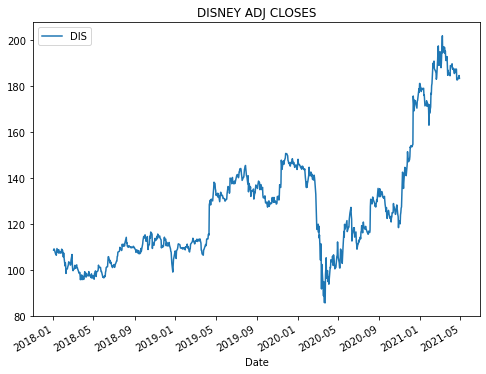

In [5]:
closes_dis.plot(figsize=[8,6])
plt.title('DISNEY ADJ CLOSES')
plt.legend(ticker)
plt.show()

Descarga de los datos de las opciones.

In [6]:
dis = web.YahooOptions('DIS')
dis_opt = dis.get_all_data().reset_index()
dis_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2021-04-30,177.5,call,DIS210430C00177500,...,2021-04-28 23:59:59,2021-04-28 16:11:18,"{'contractSymbol': 'DIS210430C00177500', 'stri..."
2021-04-30,217.5,put,DIS210430P00217500,...,2021-04-28 23:59:59,2021-03-16 16:38:35,"{'contractSymbol': 'DIS210430P00217500', 'stri..."
2021-04-30,220.0,call,DIS210430C00220000,...,2021-04-28 23:59:59,2021-04-28 16:21:04,"{'contractSymbol': 'DIS210430C00220000', 'stri..."
2021-04-30,220.0,put,DIS210430P00220000,...,2021-04-28 23:59:59,2021-03-15 04:01:18,"{'contractSymbol': 'DIS210430P00220000', 'stri..."
2021-04-30,195.0,call,DIS210430C00195000,...,2021-04-28 23:59:59,2021-04-28 19:58:46,"{'contractSymbol': 'DIS210430C00195000', 'stri..."
...,...,...,...,...,...,...,...
2023-01-20,80.0,put,DIS230120P00080000,...,2021-04-28 23:59:59,2021-04-15 14:58:55,"{'contractSymbol': 'DIS230120P00080000', 'stri..."
2023-01-20,130.0,put,DIS230120P00130000,...,2021-04-28 23:59:59,2021-04-28 17:37:09,"{'contractSymbol': 'DIS230120P00130000', 'stri..."
2023-01-20,230.0,put,DIS230120P00230000,...,2021-04-28 23:59:59,2021-04-21 16:41:58,"{'contractSymbol': 'DIS230120P00230000', 'stri..."


In [7]:
K = 130
indice_opt = dis_opt.loc[(dis_opt.Type=='put') & (dis_opt.Strike==K) & (dis_opt.Expiry=='2023-01-20')]
indice_opt


,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
224,130.0,2023-01-20,put,...,2021-04-28 23:59:59,2021-04-28 17:37:09,"{'contractSymbol': 'DIS230120P00130000', 'stri..."


In [8]:
i_opt = indice_opt.index
opcion_valuar = dis_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.7,
 'change': 0.19999981,
 'percentChange': 3.07692,
 'volume': 1,
 'openInterest': 5528,
 'bid': 5.9,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619631429,
 'impliedVolatility': 0.3079292840576171,
 'inTheMoney': False}

In [9]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  183.66


### `Simulación usando Rendimiento Simple`

>Suponemos que los rendimientos $r\sim N(\mu,\sigma_{2})$ 

In [10]:
ret = closes_dis.pct_change().iloc[1:]
ret

Symbols,DIS
Date,
2018-01-03,4.293e-03
2018-01-04,-4.452e-04
2018-01-05,-5.435e-03
2018-01-08,-1.433e-02
2018-01-09,-7.272e-04
...,...
2021-04-22,-1.911e-03
2021-04-23,1.423e-03
2021-04-26,6.830e-03


### `Visualización de los rendimientos logaritmicos`

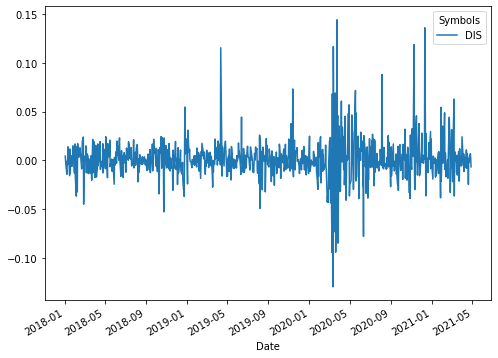

In [11]:
ret.plot(figsize=[8,6]);

>Obtengo la media y su desviación estándar.

In [12]:
mu = ret.mean()[0]
sigma = ret.std()[0]

mu,sigma

(0.0008394612471699439, 0.020768673274046856)

>Obtengo un rango de fechas

In [13]:
from datetime import date

today = pd.to_datetime(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry-today).days
nscen = 10000
dates = pd.date_range(start=today, periods = ndays)
ndays 

632

In [14]:
expiry

Timestamp('2023-01-20 00:00:00')

In [15]:
dates

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07',
               ...
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19'],
              dtype='datetime64[ns]', length=632, freq='D')

### `Simulación utilizando rendimiento simple`

In [16]:
# Para que sea diario 
dt = 1

Z = np.random.randn(ndays,nscen)

#Simulación de los rendimientos
ret_dt = pd.DataFrame(Z*sigma*np.sqrt(dt)+mu*dt,index=dates)
ret_dt

,0,1,2,...,9997,9998,9999
2021-04-28,0.002,0.015,-0.011,...,0.038,0.001,1.521e-02
2021-04-29,0.031,-0.006,0.009,...,0.020,0.007,2.187e-02
2021-04-30,0.011,-0.035,-0.035,...,0.005,-0.007,-2.052e-02
2021-05-01,0.011,0.014,0.029,...,0.002,0.023,-1.167e-02
2021-05-02,-0.012,0.006,-0.011,...,-0.013,0.005,1.992e-02
...,...,...,...,...,...,...,...
2023-01-15,0.021,-0.002,-0.068,...,-0.017,-0.006,-2.682e-03
2023-01-16,-0.018,-0.014,0.023,...,0.007,-0.020,4.221e-03
2023-01-17,-0.019,-0.003,0.010,...,-0.010,-0.049,3.327e-04
2023-01-18,-0.005,0.016,-0.002,...,0.029,-0.003,-1.034e-02


In [17]:
S0 = opcion_valuar.Underlying_Price
np.cumprod(ret_dt+1)

,0,1,2,...,9997,9998,9999
2021-04-28,1.002,1.015,0.989,...,1.038,1.001,1.015
2021-04-29,1.033,1.009,0.998,...,1.059,1.008,1.037
2021-04-30,1.044,0.974,0.964,...,1.064,1.001,1.016
2021-05-01,1.056,0.987,0.992,...,1.067,1.024,1.004
2021-05-02,1.044,0.993,0.981,...,1.053,1.029,1.024
...,...,...,...,...,...,...,...
2023-01-15,0.563,2.952,1.970,...,1.532,0.771,0.543
2023-01-16,0.552,2.910,2.015,...,1.542,0.756,0.545
2023-01-17,0.542,2.901,2.035,...,1.527,0.719,0.545
2023-01-18,0.539,2.946,2.031,...,1.572,0.717,0.540


In [18]:
# Simulando el precio
S_0 = closes_dis.iloc[-1,0]
S_T = S_0*(1+ret_dt).cumprod()

Vizualisación de los precios simulados junto con los precios descargados

Text(0.5, 1.0, 'Simulación de precios usando rendimiento simple')

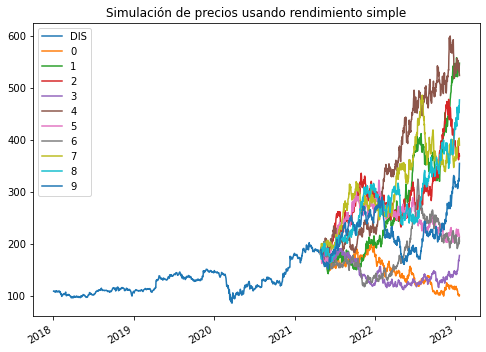

In [19]:
pd.concat([closes_dis,S_T.iloc[:,:10]]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple')

### `Simulación usando Rendimiento Logaritmico`

In [20]:
# función que obtiene los redimientos logaritmicos
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [21]:
r_log = calc_daily_ret(closes_dis)
r_log

Symbols,DIS
Date,
2018-01-03,4.284e-03
2018-01-04,-4.453e-04
2018-01-05,-5.450e-03
2018-01-08,-1.444e-02
2018-01-09,-7.274e-04
...,...
2021-04-22,-1.913e-03
2021-04-23,1.422e-03
2021-04-26,6.807e-03


### `Visualización de los rendimientos logaritmicos`

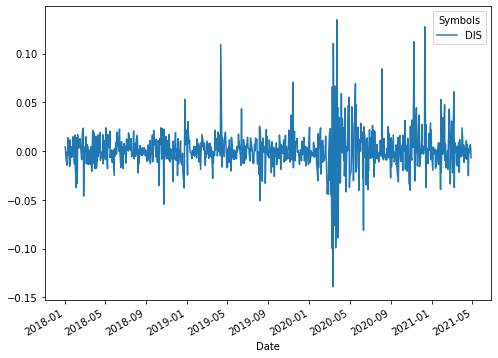

In [22]:
r_log.plot(figsize=[8,6]);

>Media y desviación estándar de los rendimientos logaritmicos

In [23]:
mu_r = r_log.mean()[0]
sigma_r = r_log.std()[0]

mu_r, sigma_r

(0.0006260879772115214, 0.020613204082094775)

In [24]:
# simulación del rendimiento
Z = np.random.randn(ndays,nscen)
sim_ret_log = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt),index=dates)
sim_ret_log

,0,1,2,...,9997,9998,9999
2021-04-28,0.039,-0.034,-2.832e-02,...,-0.016,-4.669e-04,0.022
2021-04-29,-0.018,-0.016,-2.963e-02,...,0.031,2.744e-03,0.002
2021-04-30,0.021,-0.015,8.534e-03,...,-0.003,1.889e-02,0.001
2021-05-01,-0.005,0.007,8.150e-03,...,0.026,3.198e-02,0.001
2021-05-02,0.042,0.008,3.028e-03,...,-0.008,-1.081e-02,0.006
...,...,...,...,...,...,...,...
2023-01-15,-0.060,-0.040,5.781e-02,...,-0.012,1.619e-02,-0.022
2023-01-16,0.030,0.006,-9.942e-03,...,0.011,1.575e-03,0.005
2023-01-17,0.007,0.013,1.258e-02,...,-0.003,-1.082e-02,-0.006
2023-01-18,-0.006,0.015,8.812e-03,...,-0.063,2.233e-02,0.010


In [25]:
# simulación del precio
S_0 = closes_dis.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_log.cumsum())
S_T2.iloc[0,:]=S_0
S_T2

,0,1,2,...,9997,9998,9999
2021-04-28,183.390,183.390,183.390,...,183.390,183.390,183.390
2021-04-29,187.185,174.535,173.064,...,186.154,183.808,187.848
2021-04-30,191.220,171.931,174.547,...,185.616,187.314,188.075
2021-05-01,190.174,173.080,175.975,...,190.545,193.400,188.297
2021-05-02,198.237,174.451,176.509,...,188.949,191.320,189.442
...,...,...,...,...,...,...,...
2023-01-15,1024.879,528.324,149.861,...,354.505,439.487,128.843
2023-01-16,1055.680,531.347,148.379,...,358.286,440.180,129.532
2023-01-17,1063.367,538.539,150.258,...,357.300,435.444,128.768
2023-01-18,1057.127,546.538,151.587,...,335.360,445.279,130.058


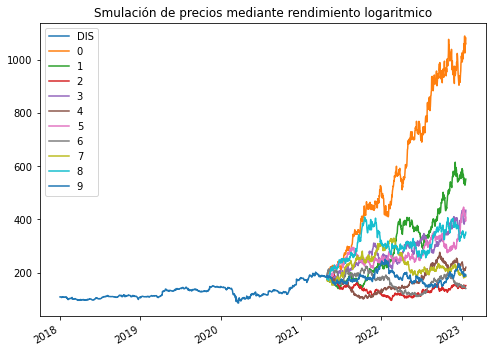

In [26]:
# precios simulados con los precios descargados
pd.concat([closes_dis,S_T2.iloc[:,:10]]).plot(figsize=[8,6])
plt.title('Smulación de precios mediante rendimiento logaritmico')
plt.show()

In [27]:
error = np.abs(S_T-S_T2).mean().mean()
print('error absoluto entre precios simulados con rendimiento simple y logaritmico',error)

error absoluto entre precios simulados con rendimiento simple y logaritmico 99.0460656485542


Encontar el valor de la opción según su función de pago en este caso para una put es la siguiente:

$$ max(K-S_T,0)$$

### `Valuación usando el modelo de Black & Scholes`

Ya que estamos en un mundo neutral al riesgo ( a un año) tomamos la tasa libre de riesgo y no la media.

La tomo de:  https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [28]:
r = (0.06/100)/360

Simulo el tiempo de contato desde HOY hasta la fecha de Expiración con 1000 escenarios.

In [29]:
nscen = 10000
sim_ret = pd.DataFrame(sigma_r*np.random.randn(ndays,nscen)+r,index=dates)
sim_ret.cumsum()

,0,1,2,...,9997,9998,9999
2021-04-28,0.004,-0.009,-0.014,...,0.015,-1.195e-02,-3.513e-02
2021-04-29,0.034,-0.026,-0.035,...,0.025,-1.527e-02,-1.838e-02
2021-04-30,0.042,0.004,-0.097,...,0.044,-3.052e-02,6.795e-04
2021-05-01,0.058,0.010,-0.100,...,0.058,-3.000e-02,2.157e-03
2021-05-02,0.059,-0.012,-0.064,...,0.090,1.724e-02,-3.871e-03
...,...,...,...,...,...,...,...
2023-01-15,-0.381,0.598,-0.390,...,-0.087,1.703e-02,3.022e-01
2023-01-16,-0.378,0.565,-0.384,...,-0.110,-4.216e-04,3.184e-01
2023-01-17,-0.380,0.545,-0.359,...,-0.083,1.341e-02,3.348e-01
2023-01-18,-0.383,0.520,-0.356,...,-0.126,-5.783e-03,3.282e-01


Despúes de simular los rendimientos, calculo los escenarios de precios.

In [30]:
S0 = closes_dis.iloc[-1,0]
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes.iloc[0,:]
sim_closes

,0,1,2,...,9997,9998,9999
2021-04-28,184.122,181.764,180.752,...,186.196,181.212,177.059
2021-04-29,189.740,178.729,177.153,...,188.088,180.611,180.050
2021-04-30,191.273,184.205,166.417,...,191.720,177.877,183.515
2021-05-01,194.401,185.176,165.873,...,194.280,177.971,183.786
2021-05-02,194.459,181.255,172.037,...,200.709,186.579,182.682
...,...,...,...,...,...,...,...
2023-01-15,125.286,333.455,124.202,...,168.164,186.539,248.085
2023-01-16,125.713,322.683,124.906,...,164.279,183.313,252.158
2023-01-17,125.388,316.333,128.012,...,168.838,185.865,256.327
2023-01-18,125.041,308.549,128.474,...,161.689,182.333,254.619


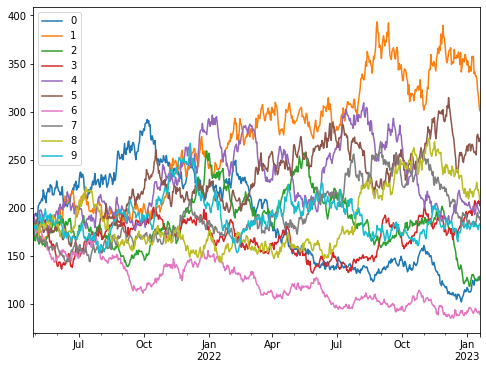

In [31]:
sim_closes.iloc[:,:10].plot(figsize=(8,6)); # solo grafico 10 

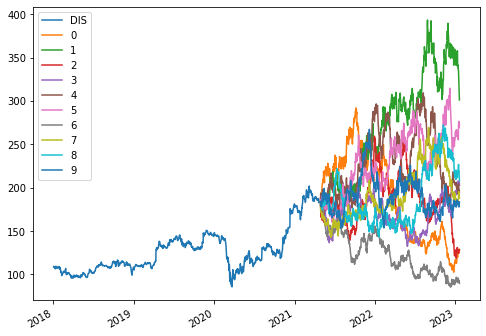

In [32]:
# precios simulados 

pd.concat([closes_dis,sim_closes.iloc[:,:10]]).plot(figsize=(8,6));

Obtengo la volatilidad implicita de los datos de la opción

In [33]:
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.7,
 'change': 0.19999981,
 'percentChange': 3.07692,
 'volume': 1,
 'openInterest': 5528,
 'bid': 5.9,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619631429,
 'impliedVolatility': 0.3079292840576171,
 'inTheMoney': False}

In [34]:
sigma = 0.3076851458740234/np.sqrt(252)
sigma

0.019382342335507077

In [35]:
S0 = closes_dis.iloc[-1,0]

K = opcion_valuar['JSON']['strike']

ndays = len(dates)
nscen = 10000

# simulo rendimientos
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)

# simulo precios
sim_closes = S0*np.exp(sim_ret.cumsum())

In [36]:
sim_closes.head()

,0,1,2,...,9997,9998,9999
2021-04-28,184.546,178.463,181.107,...,183.914,183.369,182.025
2021-04-29,181.353,176.599,184.562,...,181.962,186.545,178.864
2021-04-30,179.516,176.660,184.736,...,183.534,183.454,176.628
2021-05-01,180.215,177.226,179.120,...,181.488,193.075,176.795
2021-05-02,183.753,183.391,175.662,...,181.139,185.045,178.926


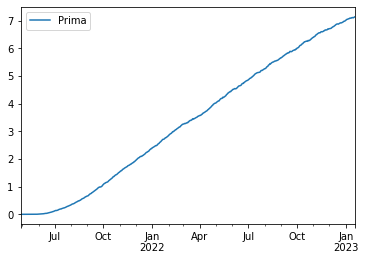

In [37]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]),index=dates)

# valor del pull europeo de disney
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                    *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)},index=dates)

put.plot();

La valuación de la opcíón es:

In [38]:
put.iloc[-1]

Prima    7.146
Name: 2023-01-19 00:00:00, dtype: float64

### `Simulación de precios usando técnicas de reducción de varianza`

(_muestreo estratificado_)

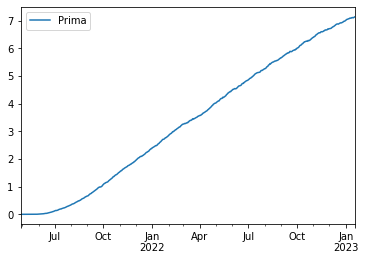

In [39]:
nscen = 10000
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

La valuación de la opcíón es:

In [40]:
put.iloc[-1]

Prima    7.146
Name: 2023-01-19 00:00:00, dtype: float64

**Intervalo de confianza del 99%**

In [41]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza,loc=mean_est, scale = sigma_est)
print('intervalo de confianza al 99%',i2)

intervalo de confianza al 99% (4.397724952004923, 9.89329875000755)


**Análisis de la distribución de rendimientos**

## **Ajustando una distribución normal**

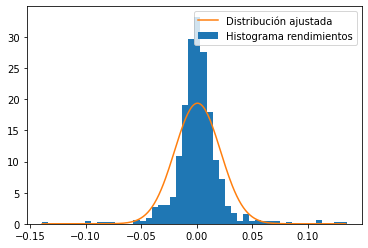

In [42]:
ren = calc_daily_ret(closes_dis) # rendimientos 

#Histograma
y,x,des = plt.hist(ren['DIS'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal

# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)

# Vector de rendimientos 
ren_gen = np.arange(ren_min,ren_max,0.001)



# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

## **Ajustando una distribución t**

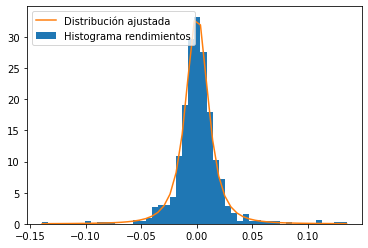

In [43]:
# rendimientos 
ren = calc_daily_ret(closes_dis) 

# Histograma de los rendimientos
y, x, _ = plt.hist(ren['DIS'], bins=50, density=True, label='Histograma rendimientos')

# Se ajustan los parámetros de una distribución
dist = 't'
params = getattr(st, dist).fit(ren.values) 

# Generación de la pdf de la distribución ajustado con los parámetros encontrados
curve_fit = getattr(st, dist).pdf(x, *params)
plt.plot(x, curve_fit, label='Distribución ajustada')
plt.legend()
plt.show()



## Grafica QQ

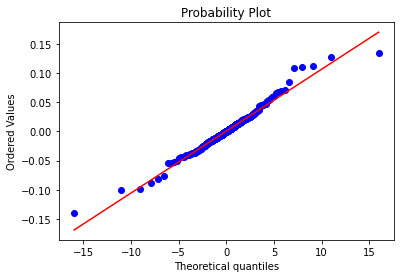

In [44]:
# Q-Q
st.probplot(ren['DIS'], sparams=params[:-2], dist=dist, plot=plt);

En la gráfica QQ se puede observar que la distribución tiene una alta kurtosis ya que muchos datos se encuentran cerca de la media y también tiene colas muy pesadas.

### `Valuación usando simulación: uso del histograma de rendimientos`

Definiendo número de escenarios y días para la matriz

In [45]:
nscen = 10

In [46]:
ndays,nscen

(632, 10)

Definiedo la probabilidad con los valores ya conocidos de y provenientes del histograma
así como los rendimientos que están en _x_.

In [47]:
prob = y/np.sum(y)
values = x[1:]

In [48]:
# comprobamos que en efecto la suma de las prob es igual a 1
prob.sum()

0.9999999999999998

Rendimientos simulados

In [49]:

ret = np.random.choice(values, ndays*nscen, p=prob)
#fechas
dates = pd.date_range(start=today,periods=ndays)


sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-04-28,-0.013,0.014,0.003,...,0.003,0.009,0.063
2021-04-29,0.014,-0.008,-0.019,...,-0.002,0.009,0.003
2021-04-30,0.003,0.014,-0.002,...,-0.002,-0.002,-0.008
2021-05-01,-0.013,-0.002,0.014,...,0.003,0.009,0.014
2021-05-02,0.009,0.025,-0.008,...,-0.024,-0.008,0.003
...,...,...,...,...,...,...,...
2023-01-15,0.003,0.003,-0.008,...,0.003,-0.019,-0.008
2023-01-16,-0.035,0.025,0.058,...,-0.035,0.014,0.025
2023-01-17,0.020,-0.008,0.003,...,-0.030,-0.008,-0.002
2023-01-18,-0.035,0.003,0.025,...,0.003,-0.002,-0.002


In [50]:
sim_closes_hist = (closes_dis.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-04-28,180.990,186.013,183.987,...,183.987,184.997,195.407
2021-04-29,183.579,184.586,180.588,...,183.579,186.619,196.044
2021-04-30,184.177,187.226,180.187,...,183.171,186.204,194.540
2021-05-01,181.767,186.811,182.764,...,183.768,187.836,197.323
2021-05-02,183.360,191.568,181.363,...,179.388,186.396,197.965
...,...,...,...,...,...,...,...
2023-01-15,1909.541,1051.425,2351.121,...,1110.590,1239.094,1847.837
2023-01-16,1843.734,1078.203,2491.509,...,1072.317,1256.815,1894.899
2023-01-17,1880.369,1069.935,2499.623,...,1041.046,1247.178,1890.691
2023-01-18,1815.567,1073.420,2563.284,...,1044.436,1244.408,1886.493


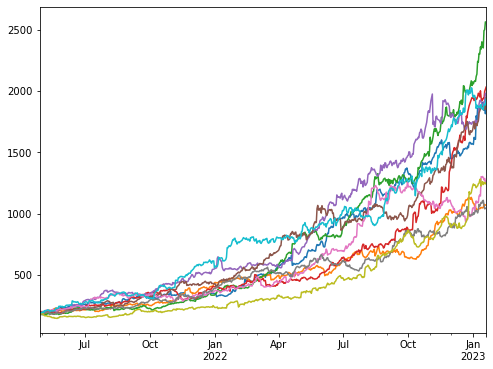

In [51]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

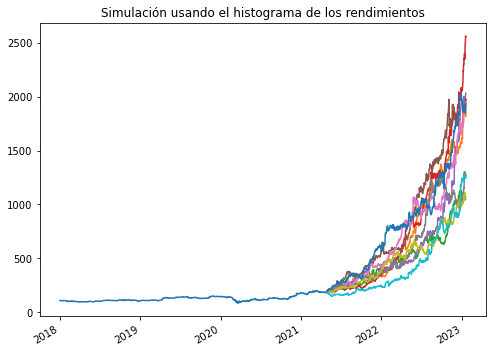

In [52]:
pd.concat([closes_dis,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [53]:
K = opcion_valuar['JSON']['strike']
ndays = len(dates)
nscen = 10000

# Histograma tomando la tasa libre de riesgo
freq, values = np.histogram(r_log+r-mu, bins=2000)
prob = freq/np.sum(freq)

# Simulación de los rendimientos
ret = np.random.choice(values[1:], ndays*nscen, p=prob)

# Simulación de precios
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_dis.iloc[-1,0]) * np.exp(sim_ret_hist.cumsum())

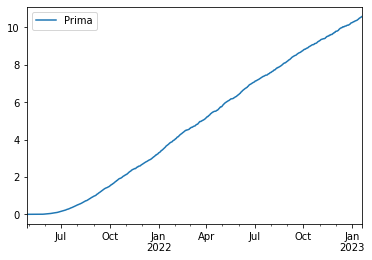

In [54]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();


El valor de la opción es de:

In [55]:
put_hist.iloc[-1]

Prima    10.581
Name: 2023-01-19 00:00:00, dtype: float64

In [56]:
opcion_valuar['JSON']

{'contractSymbol': 'DIS230120P00130000',
 'strike': 130.0,
 'currency': 'USD',
 'lastPrice': 6.7,
 'change': 0.19999981,
 'percentChange': 3.07692,
 'volume': 1,
 'openInterest': 5528,
 'bid': 5.9,
 'ask': 6.8,
 'contractSize': 'REGULAR',
 'expiration': 1674172800,
 'lastTradeDate': 1619631429,
 'impliedVolatility': 0.3079292840576171,
 'inTheMoney': False}

In [57]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print('intervalo de confianza de la distribución t',i1)
print('Intervalo de la distribución normal',i2)

intervalo de confianza de la distribución t (8.514609721541476, 12.64688991542982)
Intervalo de la distribución normal (8.514859824341196, 12.6466398126301)
